<a href="https://colab.research.google.com/github/urmila-24/DATA_ANALYSIS-LAB/blob/main/Assignment4_CS_201951164_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install joypy

In [3]:
import sys
sys.path.append("/home/prashant/anaconda3/envs/Blender282/lib/python3.8/site-packages/")
import pandas.util.testing as tm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:

eggs = pd.read_csv("/content/Egg_Production_2007_2012.csv")
eggs.head()
milk = pd.read_csv("/content/Milk_Production_2007_2012.csv")
milk.head()

,States,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


# Question 1. Merge two data into a data frame such that the new data frame has multi-level columns (like years under milk/eggs). Try to change the column names if required.

In [ ]:
merge = pd.merge(eggs,milk,on ='States/Uts')
merge.head()
newColumns = [("","States/Uts"), ("Eggs","2007-08"),  ("Eggs","2008-09"),  ("Eggs","2009-10"),  ("Eggs","2010-11"),  ("Eggs","2011-12"),  ("Milk","2007-08"), ("Milk","2008-09"), ("Milk","2009-10"), ("Milk","2010-11"), ("Milk","2011-12")]
merge.columns = pd.MultiIndex.from_tuples(newColumns)
merge.head()


# 2. Present the production of milk in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab on 2007-2008 as the Pie chart. The pie chart should consist of proportion in percentage and labels for each piece.

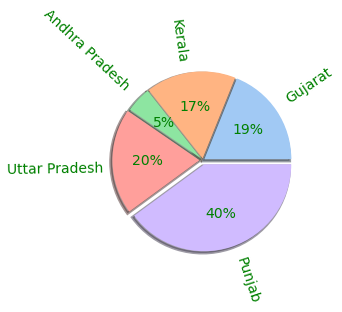

In [18]:
states = ["Gujarat", "Kerala", "Andhra Pradesh", "Uttar Pradesh", "Punjab"]
data = milk[milk["States"].isin(states)]["2007-08"]
colors = sns.color_palette('pastel')[0:5]
label=states
explode=[0.02,0.02,0.02,0.04,0.05]
plt.pie(data, labels=label,colors = colors,autopct = '%0.0f%%',explode = explode,shadow = 'True',textprops = {'color': 'Green','fontsize':14},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
plt.show()


# 3. Plot five pie charts of egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Punjab overt the five year range. Each pie chart should represent the milk production in above five states of a year.


(0.0, 1.0, 0.0, 1.0)

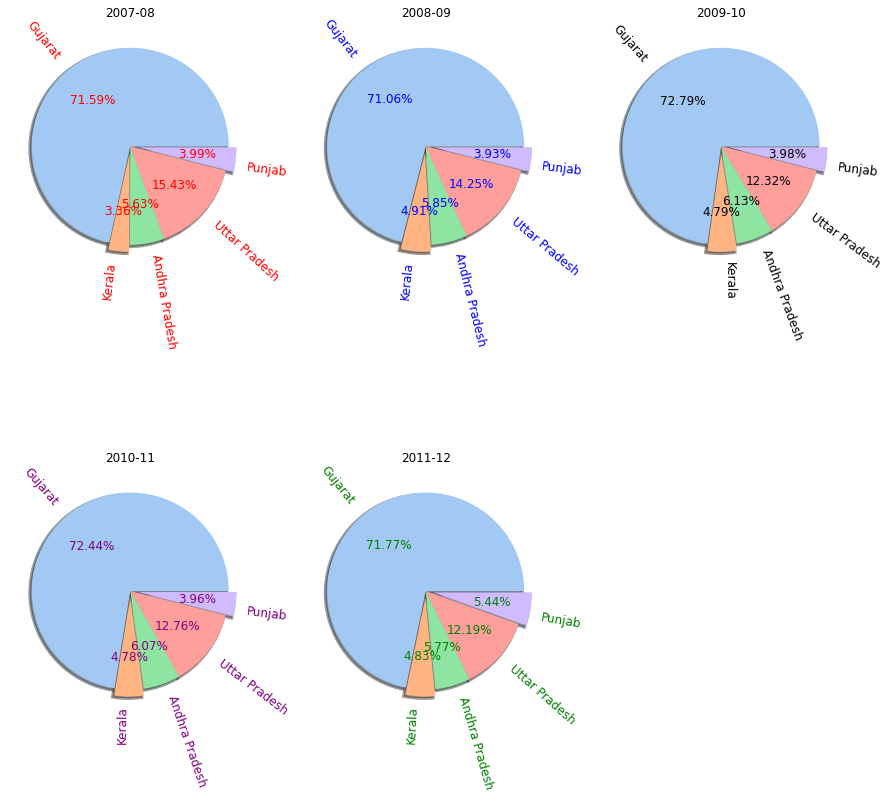

In [12]:
states = ["Gujarat", "Kerala", "Andhra Pradesh", "Uttar Pradesh", "Punjab"]

eggdata1 = eggs[eggs["States/Uts"].isin(states)]["2007-08 (In lakh nos.)"]
eggdata2 = eggs[eggs["States/Uts"].isin(states)]["2008-09 (In lakh nos.)"]
eggdata3 = eggs[eggs["States/Uts"].isin(states)]["2009-10 (In lakh nos.)"]
eggdata4 = eggs[eggs["States/Uts"].isin(states)]["2010-11 (In lakh nos.)"]
eggdata5 = eggs[eggs["States/Uts"].isin(states)]["2011-12 (In lakh nos.)"]
colors = sns.color_palette('pastel')[0:5]
explode=[0,0.07,0,0,0.08]
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

axs[0, 0].pie(eggdata1, labels=states,colors = colors, autopct="%.2f%%",explode = explode,shadow = 'True',textprops = {'color': 'Red','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 0].set_title("2007-08")
axs[0, 1].pie(eggdata2, labels=states,colors = colors, autopct="%.2f%%",explode = explode,shadow = 'True',textprops = {'color': 'Blue','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 1].set_title("2008-09")
axs[0, 2].pie(eggdata3, labels=states,colors = colors, autopct="%.2f%%",explode = explode,shadow = 'True',textprops = {'color': 'Black','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 2].set_title("2009-10")
axs[1, 0].pie(eggdata4, labels=states,colors = colors, autopct="%.2f%%",explode = explode,shadow = 'True',textprops = {'color': 'Purple','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[1, 0].set_title("2010-11")
axs[1, 1].pie(eggdata5, labels=states,colors = colors, autopct="%.2f%%",explode = explode,shadow = 'True',textprops = {'color': 'Green','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[1, 1].set_title("2011-12")
axs[1, 2].axis('off')

# 4. Plot Stacked Area Chart that represents state wise (i.e. states are in x axis) production of eggs (y-axis). There would be five stacked colors and each color represents the production in a year for different states. The egg production for each state should be normalized over the year range.


In [13]:
data = eggs[eggs["States/Uts"].isin(states)]
data.index = data["States/Uts"]
data.drop(columns=["States/Uts"], inplace=True)

data.columns = ["2007-08", "2008-09", "2009-10", "2010-11", "2011-12"]

data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,2007-08,2008-09,2009-10,2010-11,2011-12
States/Uts,,,,,
Andhra Pradesh,175884,183446,193958,201277,212103
Gujarat,8256,12675,12762,13269,14269
Kerala,13831,15095,16330,16856,17049
Punjab,37914,36790,32828,35449,36030
Uttar Pradesh,9814,10140,10596,10991,16075


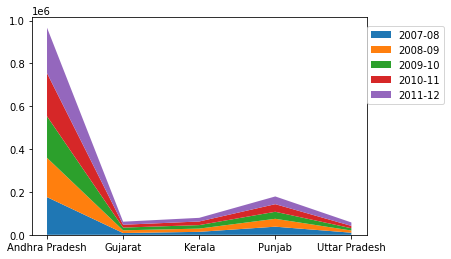

In [14]:
plt.stackplot(data.index, data["2007-08"], data["2008-09"], data["2009-10"], data["2010-11"], data["2011-12"], labels=data.columns)
plt.legend(loc=(1.0, 0.6))

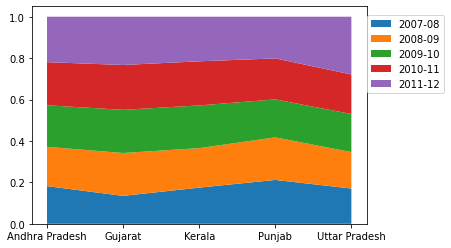

In [15]:
norm = data.div(data.sum(axis=1), axis=0)
norm1 = data.div(data.mean(axis=1), axis=0)

plt.stackplot(norm.index, norm["2007-08"], norm["2008-09"], norm["2009-10"], norm["2010-11"], norm["2011-12"], labels=norm.columns)
plt.legend(loc=(1.0, 0.6))